<a href="https://colab.research.google.com/github/Prachi-Rajguru/LinkBridge/blob/main/Transport%20Demand%20Prediction%20for%20Mobiticket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

df = pd.read_csv('train_revised.csv')

In [5]:
df.head() #first five rows

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [6]:
df.tail() #last five rows

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


In [7]:
df.info() # Column types & non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [8]:
df.describe() # Summary statistics

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


In [9]:
df.isnull().sum() # Check missing values

,0
ride_id,0
seat_number,0
payment_method,0
payment_receipt,0
travel_date,0
travel_time,0
travel_from,0
travel_to,0
car_type,0
max_capacity,0


In [12]:
print(df.columns)

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')


<Axes: xlabel='seat_number', ylabel='Count'>

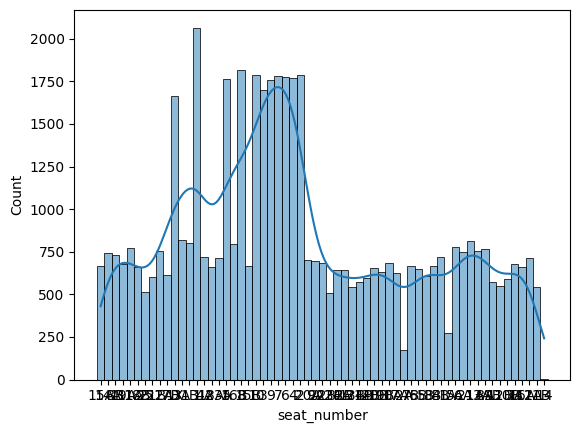

In [13]:
# Histogram of seats booked
sns.histplot(df['seat_number'], kde=True)

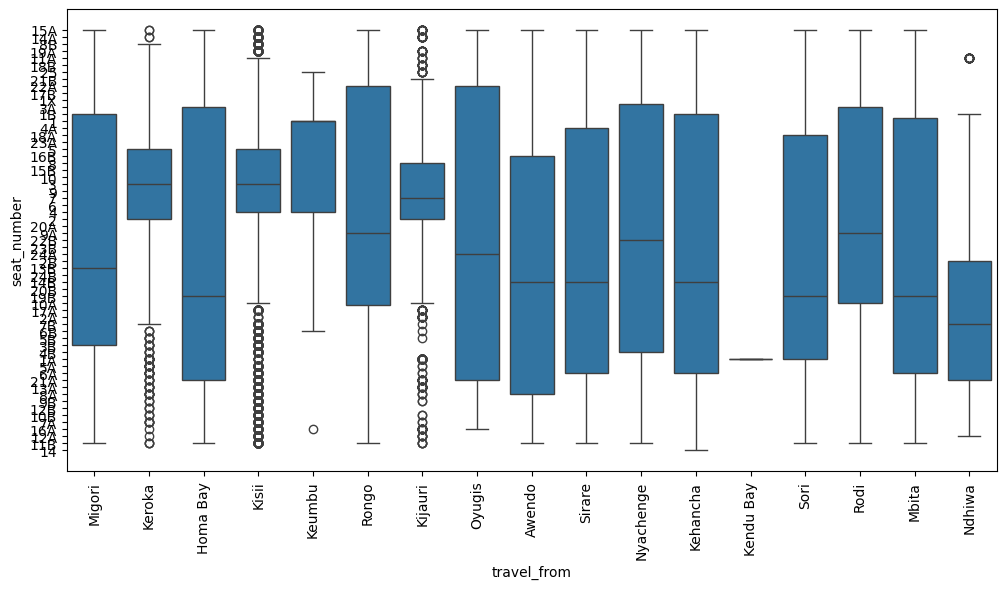

In [14]:
# Boxplot per route (if route info exists)
if 'travel_from' in df.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='travel_from', y='seat_number', data=df)
    plt.xticks(rotation=90)

In [19]:
# Step: Aggregate by date + route
df_grouped = df.groupby(['travel_date', 'travel_from']).agg({'seat_number': 'count'}).reset_index()
df_grouped.rename(columns={'seat_number': 'total_seats_booked'}, inplace=True)
# Convert 'travel_date' to datetime
df['travel_date'] = pd.to_datetime(df['travel_date'])

In [20]:
# Extract features
df['day'] = df['travel_date'].dt.day

In [21]:
df['month'] = df['travel_date'].dt.month

In [22]:
df['day_of_week'] = df['travel_date'].dt.dayofweek

In [23]:
# Encode 'travel_from' and 'car_type' if they exist
df = pd.get_dummies(df, columns=['travel_from', 'car_type'], drop_first=True)

In [24]:
df = df.drop(['travel_date'], axis=1)

In [25]:
X = df.drop('total_seats', axis=1)   # Features

KeyError: "['total_seats'] not found in axis"